Name: Luzyannet Ballesteros 

Labpartner(s): Rene 

In [ ]:
#import statements go here

In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


In [31]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


# Class 10.1

# Warmups 10.1

If you do not complete the warmup during the class period, complete for homework and review/expand for weekly practice. These are basic coding skills you need to be comfortable with. Work on the following for 25 min and then we will go over them together:

**W.1** Write a function that given two numbers returns the maximum. Figure out the maximum number using logical control (no pre-made max functions)

In [10]:
def max_number(num1,num2): ## setting the function 
    if num1>num2: # this is saying if number 1 is greater than number 2 select the greater one
        return num1
    else:# this says that if the above statement is false then is the other number 
        return num2 

In [11]:
max_number(13,25)

25

In [12]:
max_number(40,65)

65

**W.2** Modify the function we developed in Lab. 9.2 W.1 to return n consective even integers

In [4]:
def evennumb(counter):
    n = counter # counter, testing
    start = 0 # first number
    my_list = [start] # brakets make it a list
    next_num = start

    # some kind of loop, count down until we have the number of odd intergers we want in the list (countdown)
    while n>1:

        # already have one element, so can count down at the beginning
        n = n-1 #decrease counter
        # n-=1
        #print('n = ' + str(n))

        # add two to start and keep doing this
        next_num= next_num +2 #3
        #print(next_num)

        # add the resulting number to my_list
        #my_list.append(next_num)
        my_list = my_list + [next_num]
        #print(my_list)
        
    # return the list of numbers
    return my_list

In [6]:
evennumb(5)

[0, 2, 4, 6, 8]

# Lecture 10.1

### Agenda:
- Announcements
    - changes in gradiing proccess, deadlines
    - Done with datacamp
- Shoutouts for good work (Paola, Luz)
- Lab 7.2 review
- Cartopy
- Movies (with Victoria Garza)


#### Announcements

Because my health has improved since the beginning of the term, and as we move into the more advanced material, I am taking over the grading from Adrian. Join me in thanking him for his assistance to us all in a time of need. I am working on catching up on the grading now and will finish this next week. So check your grades for updates and to see if you need to redo anything. I have added my research assistant and scientific programmer Victoria Garza to slack. She is available to you all for questions as we move into the advanced material.

I did go back and re-grade some labs (4.2 in particular) as I noted they were missing some material. Please see my notes if your grade changed and submit the missing material.

Previously I mentioned that no late labs will be accepted after 4/15, at which time you all will be working on your final projects. **Further, all labs through Lab 9.2 need to have a satisfactory grade (no zeros) by 4/1 to pass the class.** Reminder thet the last drop date is 4/6. The mastery of this beginning material is needed to complete this course. This includes the functions exercise and the expected grade assignment.

We are done with datacamp! (But feel free to use it as a resource as you like)

#### Shoutouts

- Paola is student of the week for all of her excellent work, well done! 
- Luz did a great job on her CV, very creative.


### Main Lecture

#### Motivation: making nice maps and animating data are great skills for scientists to engage audiences with our results, but also to better understand the systems we are studying. 

Examples:
- Gulf of Mexico sattellite data animation
- Animation from recent SEEMS seminar speaker Dr. Scott James from Baylor


#### 7.2 Review
Today we are building on what we did in Lab 7.2, which was using xarray to plot ocean model output. The vast majority of you did not complete this lab satisfactorily, which probably had something to do with it being the week after the freeze.

Since the url I used before is no longer valid, I'm going to use the netcdf subset option on the HYCOM website, which also lets me get a subset of the data (and thus a smaller file). See https://www.hycom.org/data/gomu0pt04/expt-90pt1m000 data access button

In [16]:
link ='http://tds.hycom.org/thredds/dodsC/GOMu0.04/expt_90.1m000/FMRC/runs/GOMu0.04_901m000_FMRC_RUN_2021-04-03T12:00:00Z'

In [17]:
hycom_data = xr.open_dataset(link, decode_times=False)

In [18]:
hycom_data

<xarray.Dataset>
Dimensions:      (depth: 40, lat: 346, lon: 541, time: 133, time_1: 1)
Coordinates:
  * depth        (depth) float64 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * lat          (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon          (lon) float64 -98.0 -97.96 -97.92 ... -76.48 -76.44 -76.4
  * time         (time) float64 120.0 121.0 122.0 123.0 ... 250.0 251.0 252.0
Dimensions without coordinates: time_1
Data variables:
    tau          (time_1) float64 ...
    time_offset  (time) float64 ...
    water_u      (time, depth, lat, lon) float32 ...
    water_v      (time, depth, lat, lon) float32 ...
    water_temp   (time, depth, lat, lon) float32 ...
    salinity     (time, depth, lat, lon) float32 ...
    surf_el      (time, lat, lon) float32 ...
Attributes: (12/13)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    ...                        ...
    field_type:                instantaneous
    Conventions:               CF-1.4, NAVO_netcdf_v1.1
    _CoordSysBuilder:          ucar.nc2.dataset.conv.CF1Convention
    cdm_data_type:             GRID
    featureType:               GRID
    location:                  Proto fmrc:GOMu0.04_901m000_FMRC

In [19]:
hycom_data.time

<xarray.DataArray 'time' (time: 133)>
array([120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 151., 152., 153., 154., 155.,
       156., 157., 158., 159., 160., 161., 162., 163., 164., 165., 166., 167.,
       168., 169., 170., 171., 172., 173., 174., 175., 176., 177., 178., 179.,
       180., 181., 182., 183., 184., 185., 186., 187., 188., 189., 190., 191.,
       192., 193., 194., 195., 196., 197., 198., 199., 200., 201., 202., 203.,
       204., 205., 206., 207., 208., 209., 210., 211., 212., 213., 214., 215.,
       216., 217., 218., 219., 220., 221., 222., 223., 224., 225., 226., 227.,
       228., 229., 230., 231., 232., 233., 234., 235., 236., 237., 238., 239.,
       240., 241., 242., 243., 244., 245., 246., 247., 248., 249., 250., 251.,
       252.])
Coordinates:
  * time     (time) float64 120.0 121.0 122.0 123.0 ... 249.0 250.0 251.0 252.0
Attributes:
    long_name:            Forecast time for ForecastModelRunCollection
    standard_name:        time
    calendar:             proleptic_gregorian
    units:                hours since 2021-03-29 12:00:00.000 UTC
    _CoordinateAxisType:  Time

In [21]:
hycom_data.surf_el ## access a part of the data

<xarray.DataArray 'surf_el' (time: 133, lat: 346, lon: 541)>
[24895738 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
  * time     (time) float64 120.0 121.0 122.0 123.0 ... 249.0 250.0 251.0 252.0
Attributes:
    units:          m
    long_name:      Water Surface Elevation
    standard_name:  sea_surface_elevation
    NAVO_code:      32
    coordinates:    time_run time lat lon

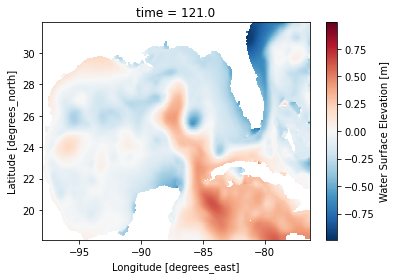

In [22]:
hycom_data.surf_el[1].plot()

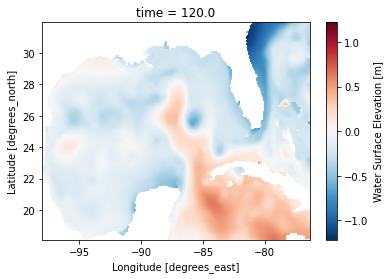

In [24]:
hycom_data.surf_el[0].plot()

In [25]:
hycom_data.water_temp

<xarray.DataArray 'water_temp' (time: 133, depth: 40, lat: 346, lon: 541)>
[995829520 values with dtype=float32]
Coordinates:
  * depth    (depth) float64 0.0 2.0 4.0 6.0 8.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
  * time     (time) float64 120.0 121.0 122.0 123.0 ... 249.0 250.0 251.0 252.0
Attributes:
    units:          degC
    long_name:      Water Temperature
    standard_name:  sea_water_temperature
    NAVO_code:      15
    comment:        in-situ temperature
    coordinates:    time_run time depth lat lon

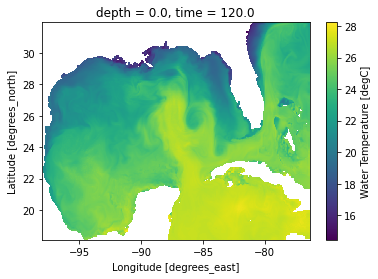

In [26]:
hycom_data.water_temp[0,0,:,:].plot()

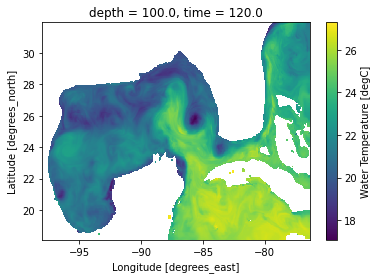

In [27]:
hycom_data.water_temp[0,19,:,:].plot()

In [29]:
##download and save the data by:
SSH_0 = hycom_data.surf_el[0]

In [30]:
type(SSH_0)

xarray.core.dataarray.DataArray

#### Cartopy https://scitools.org.uk/cartopy/docs/latest/

Now let's make a nice plot using Catopy

In [ ]:
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

There are a number of differnt map projections available in Cartopy.  

In [ ]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m')
ax.gridlines()

In [ ]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 203)) # this rotates the emap
ax.coastlines(resolution='110m')
ax.gridlines()

In [ ]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 300))
ax.coastlines(resolution='110m')
ax.gridlines()

In [ ]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Mercator()) # different map projection
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
# note this has grid labels, this is being updated for all projections in the latest version of cartopy 0.18.0

In [ ]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

Let's zoom into the Gulf of Mexico. We want to set the lat and lon range to match our HYCOM data. How do we find this?

In [ ]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

Now let's add some data

In [ ]:
# what does our data look like again?
ssh_data

In [ ]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

# let's fill in the following:
x = 
y = 
var =  

#Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call
    

Now I'm going to take a bunch of features from Victoria's demo (in github as Hycom-CartopyDemo) and add them in.

#### Making Movies demo by Victoria 
(also see ppt slides in github)

In [18]:
conda install -c conda-forge cartopy

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\luzb1\anaconda3

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cartopy-0.18.0             |  py38h7c06ecb_13         1.8 MB  conda-forge
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    geos-3.9.1                 |       h39d44d4_2         1.1 MB  conda-forge
    proj-7.2.0                 |       h3e70539_0         2.8 MB  conda-forge
    pyshp-2.1.3                |     pyh44b312d_0          36 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    shapely-1.7.1              |   py38h2426642_4         420 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.2 MB

The following NEW packages 

In [20]:
pip install cartopy

In [36]:
import cartopy.feature


# Lab 10.1

**E.1** Pick two of the examples in the Cartopy gallery (https://scitools.org.uk/cartopy/docs/latest/gallery/index.html) and go through the code. Make three modifications for each of the two examples and document what you did.

GLOBAL MAP : simple map that compares Geodetic and Plate Carree lines between two locations 

In [ ]:
# ORIGINAL MAP

C:\Users\luzb1\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


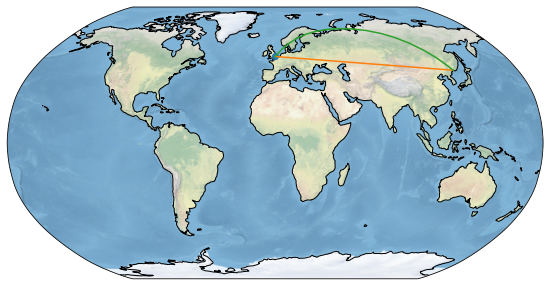

In [22]:
def main():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    ax.set_global()

    ax.stock_img()
    ax.coastlines()

    ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
    ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.PlateCarree())
    ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.Geodetic())

    plt.show()


if __name__ == '__main__':
    main()

In [ ]:
#CHANGING THE SIZE OF THE FIGURE 

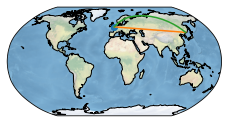

In [23]:
def main():
    fig = plt.figure(figsize=(6, 2))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    ax.set_global()

    ax.stock_img()
    ax.coastlines()

    ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
    ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.PlateCarree())
    ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.Geodetic())

    plt.show()


if __name__ == '__main__':
    main()

In [ ]:
# REMOVING THE BLACK OUTLINES 

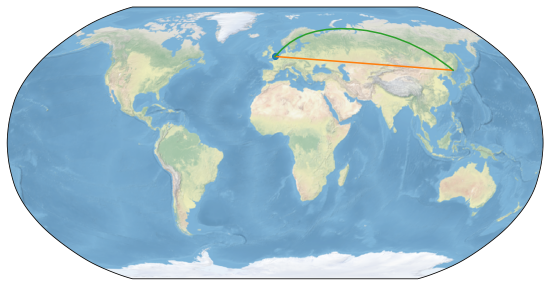

In [27]:
def main():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
    
    ax.stock_img()

    ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
    ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.PlateCarree())
    ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.Geodetic())

    plt.show()


if __name__ == '__main__':
    main()

In [ ]:
#CHANGING THE PROJECTION

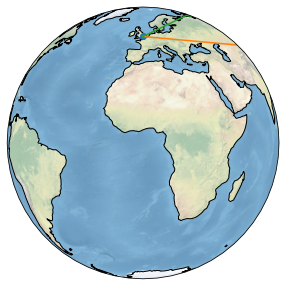

In [30]:
def main():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic())

    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    ax.set_global()

    ax.stock_img()
    ax.coastlines()

    ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
    ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.PlateCarree())
    ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.Geodetic())

    plt.show()


if __name__ == '__main__':
    main()

STREAMPLOT: Generatong vector-based streamplots


In [31]:
from cartopy.examples.arrows import sample_data

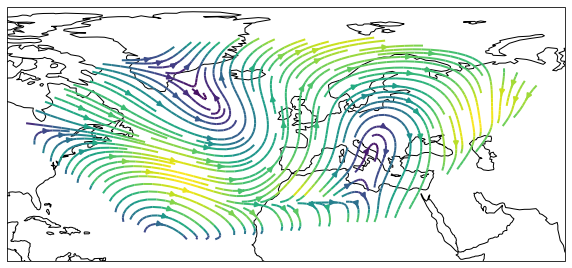

In [32]:
def main():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-90, 75, 10, 85], crs=ccrs.PlateCarree())
    ax.coastlines()

    x, y, u, v, vector_crs = sample_data(shape=(80, 100))
    magnitude = (u ** 2 + v ** 2) ** 0.5
    ax.streamplot(x, y, u, v, transform=vector_crs,
                  linewidth=2, density=2, color=magnitude)
    plt.show()


if __name__ == '__main__':
    main()

In [ ]:
#CHANGING THE FIGURE SIZE, PROJECTION AND COLOR OF THE ARROWS 

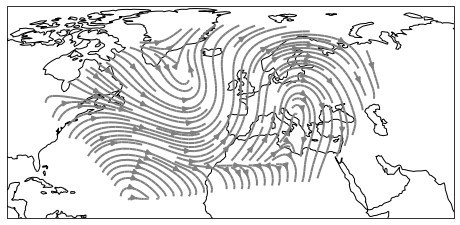

In [38]:
def main():
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
    ax.set_extent([-90, 75, 10, 85], crs=ccrs.PlateCarree())
    ax.coastlines()

    x, y, u, v, vector_crs = sample_data(shape=(80, 100))
    magnitude = (u ** 2 + v ** 2) ** 0.5
    ax.streamplot(x, y, u, v, transform=vector_crs,
                  linewidth=2, density=2, color='grey')
    plt.show()


if __name__ == '__main__':
    main()

In [ ]:
#adding stock image and country borders 


In [40]:
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

C:\Users\luzb1\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


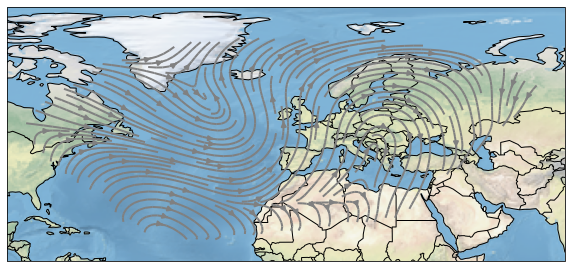

In [44]:
def main():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-90, 75, 10, 85], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.stock_img()
    ax.add_feature(cfeature.BORDERS)
    


    x, y, u, v, vector_crs = sample_data(shape=(80, 100))
    magnitude = (u ** 2 + v ** 2) ** 0.5
    ax.streamplot(x, y, u, v, transform=vector_crs,
                  linewidth=2, density=2, color='grey')
    plt.show()


if __name__ == '__main__':
    main()

In [47]:
## adding text
from matplotlib.offsetbox import AnchoredText


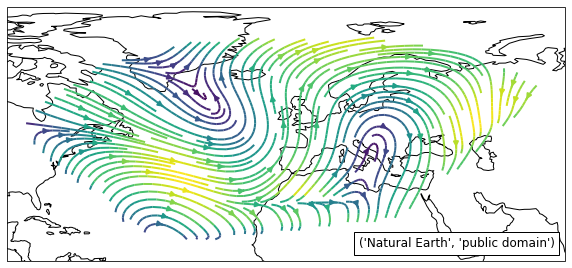

In [53]:
def main():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-90, 75, 10, 85], crs=ccrs.PlateCarree())
    ax.coastlines()

    x, y, u, v, vector_crs = sample_data(shape=(80, 100))
    magnitude = (u ** 2 + v ** 2) ** 0.5
    ax.streamplot(x, y, u, v, transform=vector_crs,
     
                linewidth=2, density=2, color=magnitude)
    
    SOURCE = 'Natural Earth'
    LICENSE = 'public domain'
    
    text = AnchoredText((SOURCE, LICENSE),
                        loc=4, prop={'size': 12}, frameon=True)
    ax.add_artist(text)
    plt.show()


if __name__ == '__main__':
    main()

**E.2** Download and plot HYCOM sea surface temperature for two diferent days (perhaps different seasons or sequential days, up to you) using cartopy. Add a grid, lat/lon labels, and annotate by adding a marker of the city/town you are living in. Make sure you adjust the colorbar to be a good fit to the data.


In [11]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

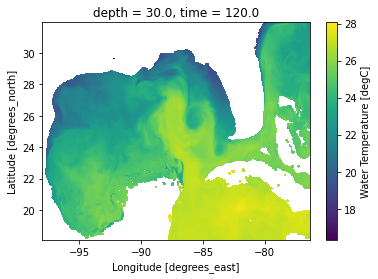

In [48]:
hycom_data.water_temp[0,10,:,:].plot()

In [49]:
Aug2021 = hycom_data.water_temp[0,10,:,:]


In [50]:
type(Aug2021)

xarray.core.dataarray.DataArray

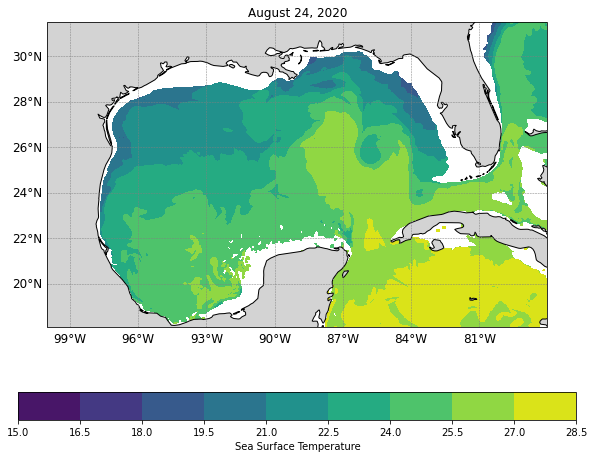

In [57]:

fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.set_title("August 24, 2020")
ax.set_xlabel("Longitude")

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)



# let's fill in the following:
x = Aug2021.lon
y = Aug2021.lat
var =  Aug2021

#Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree())
cbar = plt.colorbar(mappable = p, orientation = "horizontal")
cbar.set_label("Sea Surface Temperature")


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
          linewidth=.5, color='gray', linestyle='--')
gl.xlabels_bottom = True    
gl.ylabels_left = True
gl.xlabel_style = {'size' : 12}
gl.ylabel_style = {'size' : 12}


Same year and month different time and depth. I couldn't save it as a download it gave me an error in Jupiter Notebook that said "save disable"

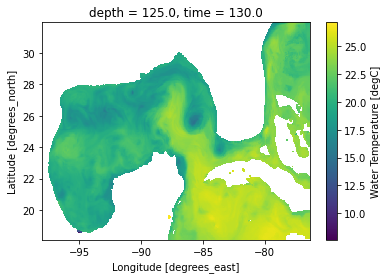

In [60]:
hycom_data.water_temp[10,20,:,:].plot()

In [61]:
Aug2021_1 = hycom_data.water_temp[10,20,:,:]

In [62]:
type(Aug2021_1)

xarray.core.dataarray.DataArray

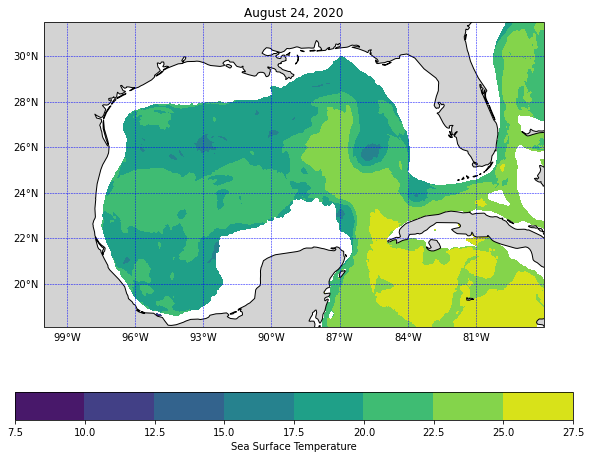

In [65]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.set_title("August 24, 2020")
ax.set_xlabel("Longitude")

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)



# let's fill in the following:
x = Aug2021_1.lon
y = Aug2021_1.lat
var =  Aug2021_1

#Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree())
cbar = plt.colorbar(mappable = p, orientation = "horizontal")
cbar.set_label("Sea Surface Temperature")


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
          linewidth=.5, color='blue', linestyle='--')
gl.xlabels_bottom = True    
gl.ylabels_left = True
gl.xlabel_style = {'size' : 10}
gl.ylabel_style = {'size' : 10}


**E.3** Animate some data. Using Davinci or the movie software of your choice, create an animated plot. This can be of any data you like. Put the code you used to plot here, and upload the resulting movie file to github.

You will demonstrate your animation to the class next Monday.

In [4]:
link ='http://tds.hycom.org/thredds/dodsC/GOMu0.04/expt_90.1m000/FMRC/runs/GOMu0.04_901m000_FMRC_RUN_2021-04-03T12:00:00Z'
hycom_data = xr.open_dataset(link, decode_times=False)


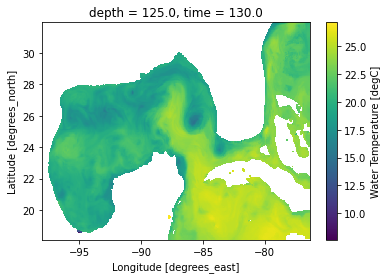

In [9]:
hycom_data.water_temp[10,20,:,:].plot()
plt.savefig('Hycom1.png')

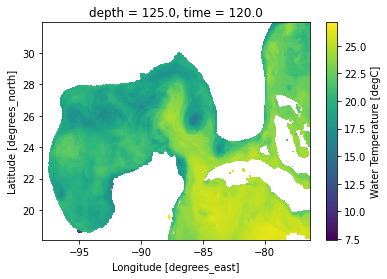

In [10]:
hycom_data.water_temp[0,20,:,:].plot()
plt.savefig('Hycom2.png')

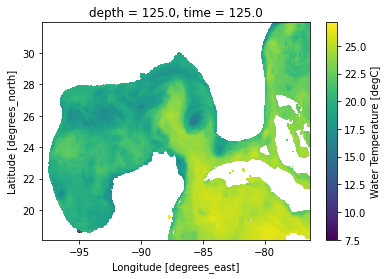

In [11]:
hycom_data.water_temp[5,20,:,:].plot()
plt.savefig('Hycom3.png')

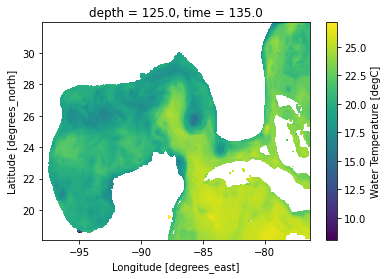

In [12]:
hycom_data.water_temp[15,20,:,:].plot()
plt.savefig('Hycom4.png')

In [ ]:
## I save them as pngs and then put them together kind of like Adam did, I think they do move but since they are very similar I don't see like huge movement, but you can add sounds